keras는 tensorflow의 확장버전으로 보면됨
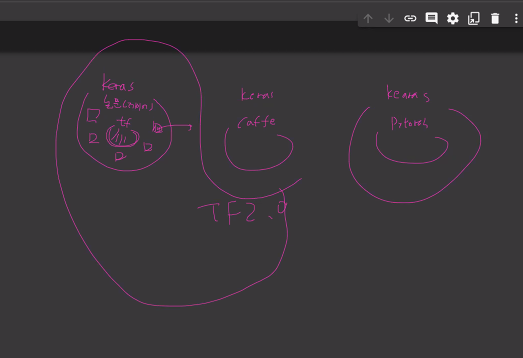
역사

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets

mnist = datasets.mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


# CPU보단 TPU 나 GPU씀. 행렬 병렬연산 더잘해서
gpu가 게임때매 나온건데 게임은 죄다 행렬로 이루어져있거덩

# Keras란?
- tensorflow를 기반으로 하는 유명한 논문, 레이어들을 구현한 패키지

# Fully connected Layer 모델링하기

- 레이어들은 tf.keras.layers 패키지에 모두 들어있다.
- Flatten Layer : 배치를 제외한 평탄화 담당
  - numpy할 때는 reshape, 배치개수 따로 빼고 해야했는데 여기선 그럴 필요 없다!
- Dense Layer : Affine연산(신경망의 행렬 내적 계산). fully connected
  - dense layer 파라미터에 activation(활성화함수)을 지정 가능
- Activation Layer : 활성화 함수 레이어(선택에 따라서 사용을 안할 수도 있다.)

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

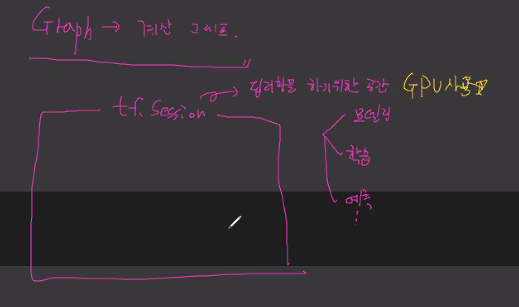

tensorflow를 따로 사용하는 공간이라고 생각하면됨. section에 계산그래프그림

# 모델 객체 생성시에 계산그래프 생성.
- session내에 ⭐계산그래프를 생성한다

In [ ]:
# Layer들 불러오기
from tensorflow.keras.layers import Input, Dense, Flatten, Activation

# 계산그래프를 그리기 위한 모델 불러오기
from tensorflow.keras import Model

# 입력층 구성 - input layer
# 나 이런 데이터를 쓸거야 라고 미리 이야기해주는 역할
input = Input(shape=(28,28))  # 배치개수를 제외한 shape을 지정해줌. 배치개수는 자동으로 해줌!
# ↑ 입력텐서임🧡


# 평탄화 - flatten layer
net = Flatten()(input)  #입력층의 값을 받아서 평탄화 수행 결과를 리턴
#↑텐서임 (784)짜리
# functional API라고함. 객체를 함수마냥 사용했지🧡

# 1층은닉층
net = Dense(512)(net) # 512는 뉴런의 개수만 지정해주면 알아서해줌! 앞에꺼 몇갠지 안써도됨
#↑텐서임 (512)짜리🧡
net = Activation("relu")(net) # 활성화함수

# 2층은닉층
net = Dense(256, activation="relu")(net) # 이러케 한번에써도됨

# 출력층
out = Dense(10, activation="softmax")(net)

# session에 계산그래프가 다 기록이됨
# 모델생성 - 계산 그래프가 세선내에 완성이 된다.
model = Model(inputs=input, outputs = out, name = "BASIC_MNIST")
model.summary() # 모델요약


Model: "BASIC_MNIST"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 activation_2 (Activation)   (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 256)               131328    
                                                                 
 dense_8 (Dense)             (None, 10)                2570      
                                                                 
Total params: 535,818
Trainable params: 535,818
Non-tra

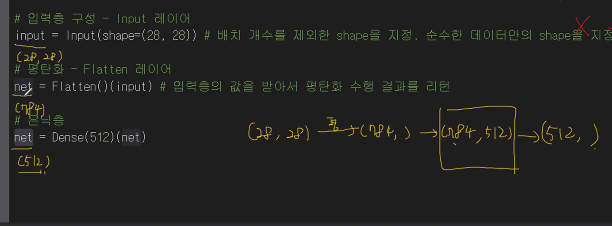

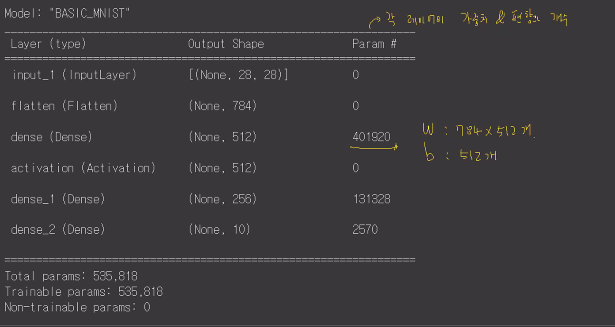

# 최적화 계획 세우기 - 컴파일과정(나 이모델에대해 학습 이렇게 할거에요)
- Loss Function(손실함수) MSE/CEE 를 쓸지 결정
- Optimizaion(최적화함수) 경사하강법 비슷한 SGD, ADAM, RMSProps 등을 지정
  - 거의 대부분 ADAM, RMSProps등을 기본으로 사용
- Metrics : '테스트 세트'에 대한 평가 기준(학습하고 상관X)⭐
  - acc, recall, precision

## Loss Function 선정 기준
* 이진 분류를 수행하는 경우(Binary Classification)
  * `mse` : 출력층의 뉴런이 1개인 경우 - with `sigmoid`
  * `cross entropy error` : 출력층의 뉴런이 2개인 경우 - with `softmax` ( 제일 자주 사용되는 방법 )
    * **`binary_crossentropy`**를 사용하면 된다.
* 다중 분류를 수행하는 경우(Multiclass Classification)
  * `cross entropy error` : 출력층의 뉴런을 클래스의 개수만큼 설정
    * **`categorical_crossentropy`**를 사용하면 된다.

## Categorical Cross Entropy의 종류 책p118
  * Label이 `[0, 1, 2]` 처럼 One-Hot Encoding이 되어있지 않은 경우
    * **`sparse_categorical_crossentropy`**를 사용
  * Label이 One-Hot Encoding이 되어있는 경우
    * **`categorical_crossentropy`**를 사용

In [ ]:
# **y_train**을 확인해서 어떤 Loss Function을 사용할지 결정
y_train.shape

(60000,)

In [ ]:
y_train[:3]

array([5, 0, 4], dtype=uint8)

In [ ]:
# OHE이 안되어있으므로 sparse_categorical_crossentropy사용해야
# 아니면 원핫인코딩해서 categorical_crossentropy쓰거나

loss_func = tf.keras.losses.sparse_categorical_crossentropy
loss_func

<function keras.losses.sparse_categorical_crossentropy(y_true, y_pred, from_logits=False, axis=-1)>

In [ ]:
# y_train이 OHE이 되어 있으면 categorical_crossentropy 사용
tf.keras.losses.categorical_crossentropy

<function keras.losses.categorical_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

In [ ]:
# 이진 분류면? binary_crossentropy
tf.keras.losses.binary_crossentropy

<function keras.losses.binary_crossentropy(y_true, y_pred, from_logits=False, label_smoothing=0.0, axis=-1)>

# Optimizer 설정
* `sgd` - `tf.keras.optimizers.SGD()`
* `rmsprops` - `tf.keras.optimizers.RMSprop()`
* `adam` - `tf.keras.optimizers.Adam()` - 일반적으로 제일 많이 사용하는 최적화 기법, 뭘 쓸지 모르겠다면 `adam`을 선택하세요

In [ ]:
optm = tf.keras.optimizers.Adam()
optm

## 테스트 세트 평가 방법(Metrics)선정

In [ ]:
# 훈련세트에는 영향X 검증이나 테스트 세트에만 영향미침!!💛💛
metrics = ["accuracy"]

# 모델 컴파일
- 텐서플로우 세션에 위치한 계산그래프에 데이터를 집어넣기 직전 작업을 완료
- 손실함수, 최적화, 평가방법들을 계산그래프에 적용시킨다

In [ ]:
model.compile(
    optimizer=optm,
    loss=loss_func,
    metrics=metrics
)

# 훈련용 하이퍼 파라미터 설정
- 에폭횟수(num_epochs)
- 배치크기(batch_size)

In [ ]:
num_epochs=10
batch_size=32

# 훈련시작

In [ ]:
model.fit(
    X_train, # 훈련 X 데이터(feature)
    y_train, # 훈련 y 레이블(target)
    batch_size=batch_size, 
    epochs=num_epochs,
    shuffle=True, # 데이터를 섞어가면서 훈련 random.choice느낌 32개씩 뽑아서
    validation_split=0.2 # 전체 훈련데이터중 검증세트의 비율
)

Epoch 1/10
1500/1500 [==============================] - 8s 3ms/step - loss: 0.2067 - accuracy: 0.9367 - val_loss: 0.1204 - val_accuracy: 0.9627
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0846 - accuracy: 0.9738 - val_loss: 0.0870 - val_accuracy: 0.9728
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0576 - accuracy: 0.9816 - val_loss: 0.0898 - val_accuracy: 0.9721
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0433 - accuracy: 0.9859 - val_loss: 0.0908 - val_accuracy: 0.9753
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0324 - accuracy: 0.9897 - val_loss: 0.1064 - val_accuracy: 0.9737
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0275 - accuracy: 0.9912 - val_loss: 0.0894 - val_accuracy: 0.9769
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0231 - accuracy: 0.9920 - val_loss: 0.1102 - val_accuracy:

# 런칭 직접 평가하는 시간

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1100 - accuracy: 0.9771


[0.10999076813459396, 0.9771000146865845]